<a href="https://colab.research.google.com/github/Magguire/K-Nearest-Neighbors-Image-Classifier/blob/master/module_2_core_week_IV_ip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Passenger Survival Analysis using K-Nearest Neighbour Classification

<b>Overview</b> 

The Titanic Passenger Survival Analysis problem is a common predictive analysis problem which requires a machine learning approach to predict which kind of passengers were likely to survive the Titanic accident.

The Titanic ship took three years to build and was believed to be practically unsinkable.

This belief was proven wrong on April 14th, 1912, when the ship hit an iceberg and sank to the bottom of the Atlantic Ocean, with approximately 2,200 passengers and crew members, the most iconic ship wreck in history.

## 1. Defining the Question

### a) Specifying the Question

We need to perform predicitve analysis on a dataset in order to find out whether a passenger survives or not based on several characteristics.

### b) Defining the Metric for Success

The metric for success is to build an optimized KNN classification model which best predicts whether a passenger survives or not. This will be validated by using different train and test sizes for checking accuracy performance of the model.

### c) Understanding the context 

 This dataset was collected for passengers who were on board during the titanic accident on whether they survived or not. We need to determine what sorts of passengers were likely to survive. 

### d) Recording the Experimental Design

Experimental Procedure:

1. Load the datasets.
2. Check the data.
3. Perform data cleaning; check for outliers, anomalies, missing data, duplicates and uniformity.
4. Perform univariate and bivariate EDA.
5. Implement solution.
   - Randomly partition the dataset into two parts i.e 80 - 20  sets.
   - Build KNN clasifier model.
   - Compute the accuracy (percentage of correct classification).
   - Report the confusion matrix of the classifier.
   - Repeat step 2 to step 4 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling.
   - Suggest and apply at least one of the optimization techniques that you learned earlier this week.
6. Provide further recommendations to improve both classifiers.  
7. Challenge your solution by providing insights on how you can make improvements in model improvement.
8. Conclusion  

### e) Data Relevance

This is a supervised machine learning problem since the dataset contains the attributes of several patients and a label that states whether the paient has hypothyroid.

## 2. Reading the Data

In [1]:
# Loading the Datasets
# train url = https://archive.org/download/train5_202002/train%20%285%29.csv
# test url = https://archive.org/download/test1_202002/test%20%281%29.csv
import pandas as pd
import numpy as np

train = pd.read_csv('https://archive.org/download/train5_202002/train%20%285%29.csv')
test =   pd.read_csv('https://archive.org/download/test1_202002/test%20%281%29.csv')

## 3. Checking the Data

In [2]:
# Determining the no. of records in our dataset
# 
train.shape, test.shape

((891, 12), (418, 11))

The train dataset contains 891 passenger records and 12 columns while the test dataset contains passenger 418 records and 11 columns.

In [3]:
# Previewing the top of our dataset
#
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### <b>Definitions</b>

* Survived: 0 = No, 1 = Yes
* pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
* sibsp: number of siblings / spouses aboard the Titanic
* parch: number of parents / children aboard the Titanic
* ticket: Ticket number
* cabin: Cabin number
* embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
# Previewing the bottom of our dataset
# 
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [7]:
# Checking whether each column has an appropriate datatype
#
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Since the test dataset has no label column(whether the passenger survived or not), we shall use the train dataset to build and test our model.

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

The dataset is the Titanic Dataset which contains information about passengers that were in the Titanic when it sank.

## 5. Tidying the Dataset

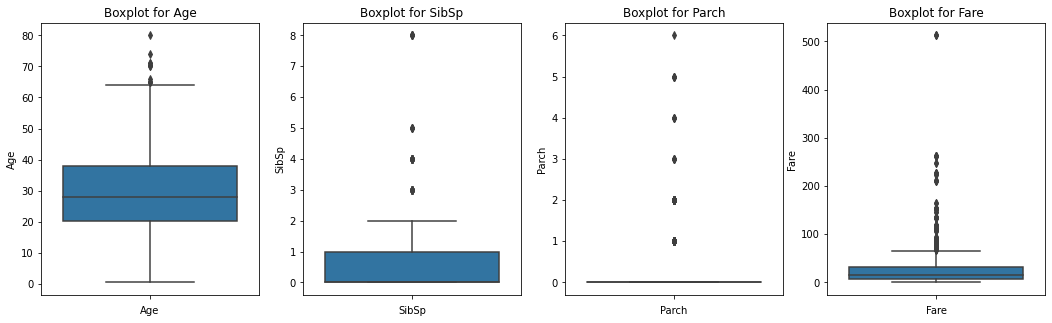

In [9]:
# Checking for Outliers
#
import matplotlib.pyplot as plt
import seaborn as sns

columns = []

for column in train.columns:
  if train[column].dtypes != 'object':
    columns.append(column)

# drop categorical columns
columns.remove('Survived')
columns.remove('Pclass')
columns.remove('PassengerId')

# plot boxplot for numerical columns
fig, ax = plt.subplots(ncols = len(columns), figsize=(18,5))

for i, column in enumerate(columns):
    sns.boxplot(y = train[column], ax=ax[i])
    ax[i].set_title('Boxplot for {}'.format(column))
    ax[i].set_xlabel(column)

plt.show()

There are several outliers in our dataset. We need to confirm whether the outliers are actual outliers or not. The fare column has a passenger who paid over 200 fare more than the rest. This looks unusual but not impossible.

In [10]:
# check anomalies

# let's check validity of the range of value in the columns range 

def ranges(column):
   max = train[column].max()
   min = train[column].min()
   return print({column: [min,max]})

for column in columns:
   ranges(column)   

{'Age': [0.42, 80.0]}
{'SibSp': [0, 8]}
{'Parch': [0, 6]}
{'Fare': [0.0, 512.3292]}


The youngest passenger in our dataset is less than a year old while the oldest is 80 years of age.

Number of total siblings and spouse of passengers range from 0 to 8.

Number of parents or children onboard for passengers range from 0 to 6.

The fare per passenger ranges from 0 to about 512.

In [11]:
# check interquatile range
def interquatile_range(column):
  q1 = train[column].quantile(.25)
  q3 = train[column].quantile(.75)
  intqr = q3 - q1
  return print({column: [q1,q3,intqr]})

for column in columns:
  interquatile_range(column)

{'Age': [20.125, 38.0, 17.875]}
{'SibSp': [0.0, 1.0, 1.0]}
{'Parch': [0.0, 0.0, 0.0]}
{'Fare': [7.9104, 31.0, 23.0896]}


50% of the passengers lie within the given interquatile range for each column.

In [12]:
# Identifying the Missing Data
#
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# create list of columns with missing values
miss_columns = ['Age', 'Cabin', 'Embarked']

# create dict to store percentage of missing values
percentages = dict()
# Convert question marks to nan
def missing(column):

  # check percentage of missing values
  percent = (train[column].isnull().sum()/train.shape[0]) * 100
  percentages[column] = percent

  return percentages


for column in miss_columns:
  missing(column)

percentages

{'Age': 19.865319865319865,
 'Cabin': 77.10437710437711,
 'Embarked': 0.22446689113355783}

Drop the cabin column since it has more than 50% missing data. We need to impute remaining missing values.

In [14]:
# drop cabin column
train.drop('Cabin', axis=1, inplace=True)

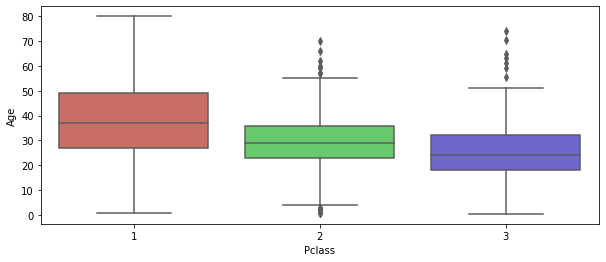

In [15]:
# fill age missing values

# Let's look at how passenger age is related to their class as a passenger on the boat.
#
plt.figure(figsize=(10,4)) 
sns.boxplot(x='Pclass', y='Age', data=train, palette='hls')

In [16]:
# since mean age differs from class, we will impute age missing values with mean age per class
 
# find mean age for each class to the nearest whole number

# pclass=1
pclass1 = train[train['Pclass']==1]
print('Pclass1 Mean Age:', round(pclass1['Age'].mean()))

# pclass=2
pclass2 = train[train['Pclass']==2]
print('Pclass2 Mean Age:', round(pclass2['Age'].mean()))

#pclass=3
pclass3 = train[train['Pclass']==3]
print('Pclass3 Mean Age:', round(pclass3['Age'].mean()))

Pclass1 Mean Age: 38
Pclass2 Mean Age: 30
Pclass3 Mean Age: 25


In [17]:
# create function that checks class of passenger and if corresponding age value is missing

def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

# apply function to our dataset

train['Age'] = train[['Age', 'Pclass']].apply(age_approx, axis=1)
        

In [18]:
# drop the null records for embarked since we will not lose too much information anyway.
train.dropna(inplace=True)

# check number of remaining records
print(train.shape[0])

# check null values to confirm there are none remaining
train.isnull().sum().sum()

889


0

In [19]:
# More data cleaning procedures
#
# check for duplicates
train.duplicated().sum()


0

In [20]:
# drop irrelevant columns for machine learning

train.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)


In [21]:
# check number of remaining records and columns
train.shape

(889, 8)

Our dataset now contains 889 passenger records and 8 columns.

In [22]:
# check uniformity in columns
train.columns 

columns = []

# convert column names to lowercase
for column in train.columns:
   column = column.lower()
   columns.append(column)

train.columns = columns
train.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

## 6. Exploratory Analysis

In [23]:
# Ploting the univariate summaries and recording our observations
#
train.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked
count,889.000000,889.000000,889,889.000000,889.000000,889.000000,889.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.382452,2.311586,NaN,29.218414,0.524184,0.382452,32.096681,NaN
std,0.486260,0.834700,NaN,13.178017,1.103705,0.806761,49.697504,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.895800,NaN
50%,0.000000,3.000000,NaN,26.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,36.500000,1.000000,0.000000,31.000000,NaN


In [24]:
# create function to plot piechart

def pie(column, explode):
  df = train.groupby(column, as_index=False)['age'].count()

  # rename age column to counts
  df.rename(columns={'age': 'counts'}, inplace=True)

  # create labels and values for the pie chart
  labels = df[column]
  values = df['counts']
  
  # define size of pie chart
  plt.figure(figsize=(10,4))
  
  # plot pie chart
  plt.pie(values, labels=labels, autopct = '%1.1f%%', explode = explode, shadow=True, startangle=100)
  plt.axis('equal')

  # title
  plt.title('Pie chart for {}'.format(column))

  # display pie chart
  return plt.show

<function matplotlib.pyplot.show>

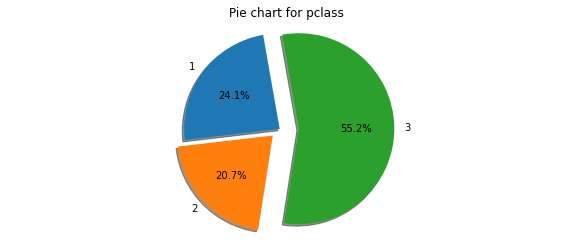

In [25]:
# passenger class representation

pie('pclass', (0,0.1, 0.2))

More than half of the passengers were in the third class.

<function matplotlib.pyplot.show>

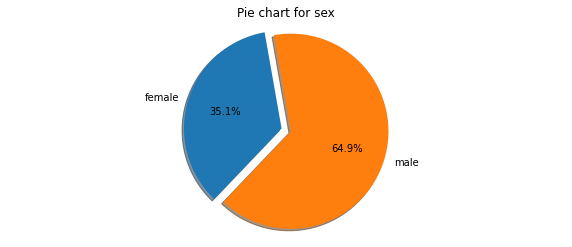

In [26]:
# gender representation

pie('sex', (0,0.1))

Most passengers were male.

<function matplotlib.pyplot.show>

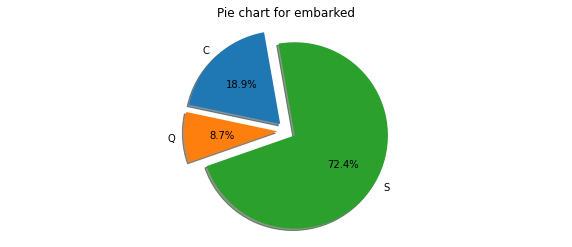

In [27]:
# representation of passengers' embarcation port

pie('embarked', (0.1,0.1, 0.1))

Most passengers boarded the ship at Southampton Port and the least boarded at Queenstown Port.

The Titanic ship is said to have been travelling from Southampton to New York.

<function matplotlib.pyplot.show>

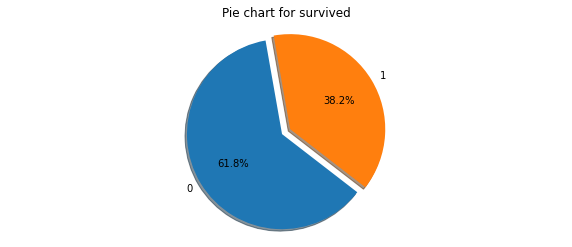

In [28]:
# representation of survival status

pie('survived', (0,0.1))

Most passengers died in the accident.

In [29]:
# Bivariate analysis

# survival status representation function
def stacked_barchart(column):

    # survived passengers
    survived = train[train['survived']==1][column].value_counts()

    # dead passengers
    dead = train[train['survived']==0][column].value_counts()

    # create dataframe for survival status counts
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))
    plt.title('Survival representation with respect to {}'.format(column))
    plt.xlabel('survival status')
    plt.ylabel('count')

    return plt.show()

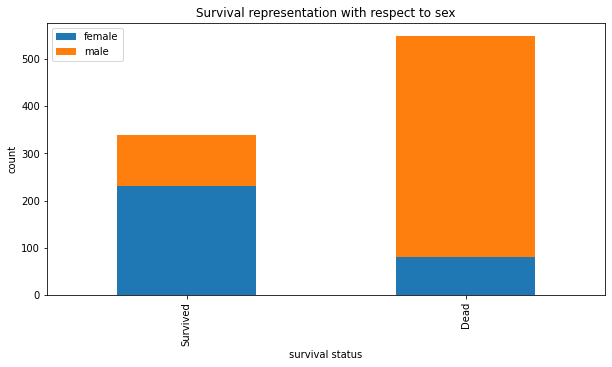

In [30]:
# survival status with repspect to gender
stacked_barchart('sex')

Despite the male passengers being more than female, more female passengers survived than male.

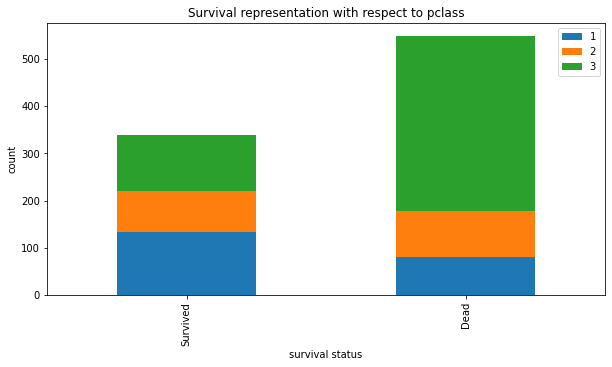

In [31]:
# # survival status with respect to passenger class

stacked_barchart('pclass')

Most passengers who survived were in the first class while most of those who died were in the third class. 

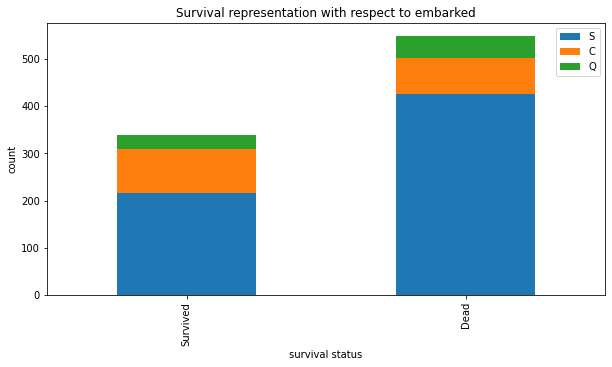

In [32]:
# survival status with respect to embarcation point

stacked_barchart('embarked')

Survival probabilities of a passenger depending on embarcation point:
- Cherbourg - most likely survived
- Queenstown - most likely died
- Southampton - moslt likely survived

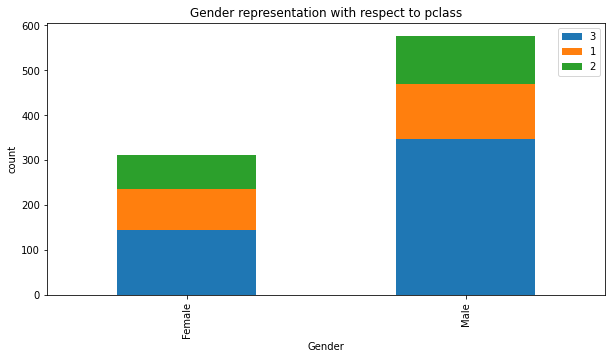

In [33]:
# passenger class representation by gender

def stacked_bar(column):

    # survived passengers
    female = train[train['sex'] == 'female'][column].value_counts()

    # dead passengers
    male = train[train['sex'] == 'male'][column].value_counts()

    # create dataframe for survival status counts
    df = pd.DataFrame([female,male])
    df.index = ['Female','Male']
    df.plot(kind='bar',stacked=True, figsize=(10,5))
    plt.title('Gender representation with respect to {}'.format(column))
    plt.xlabel('Gender')
    plt.ylabel('count')

    return plt.show()

stacked_bar('pclass')

Nearly half the female population was in the third class whereas more than half of the male population was in the third class. A male passenger is more likely to take the third class ticket compared to a female passenger. 

In [34]:
# correlation 

# convert categorical columns into numeric format

# convert sex to numeric 
sex = pd.get_dummies(train['sex'], drop_first=True)

# join the sex dataframe to the original
train = pd.concat([train, sex], axis=1)

# drop the sex column 
train = train.drop('sex',axis=1)

# preview dataset
train.head()

,survived,pclass,age,sibsp,parch,fare,embarked,male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


In [35]:
# convert embarked to numeric format using label encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['embarked'] = le.fit_transform(train['embarked'])

# preview dataset
train.head()


,survived,pclass,age,sibsp,parch,fare,embarked,male
0,0,3,22.0,1,0,7.2500,2,1
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,2,0
3,1,1,35.0,1,0,53.1000,2,0
4,0,3,35.0,0,0,8.0500,2,1


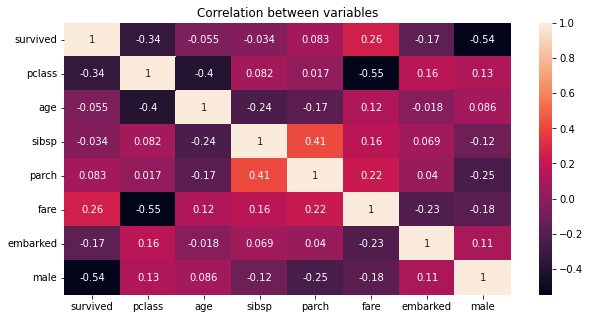

In [36]:
# plot correlation heatmap

plt.figure(figsize=(10,5))
correlations = train.corr()
sns.heatmap(correlations, annot=True)
plt.title('Correlation between variables')
plt.show()

There is strong negative correlation between passenger class and fare which is expected. Passengers in the first class pay more than those in the third class.

There is also strong negative correlation between male and survival status, which implies that male passengers were less likely to survive.

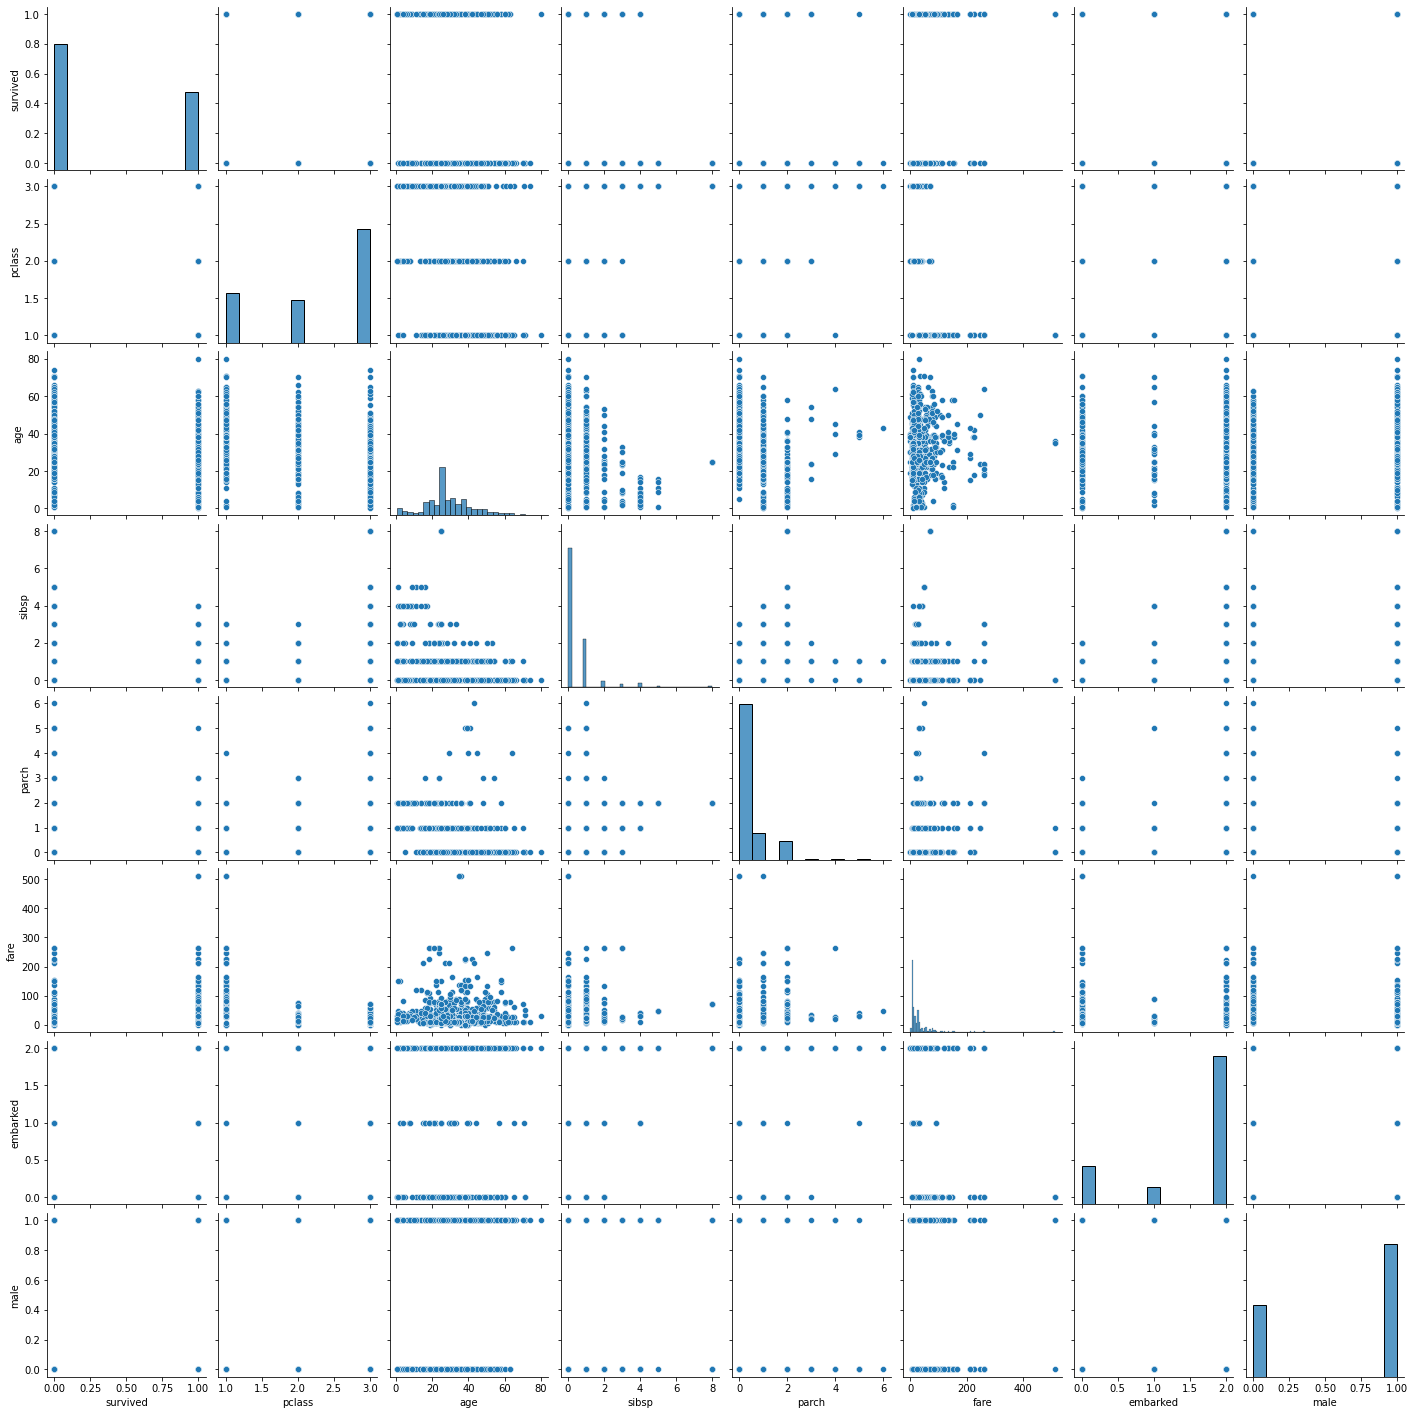

In [37]:
# pairplot
sns.pairplot(train)

## 7. Implementing the Solution

### KNN Classifier model

In [74]:
# split data into dependent and independent variables
X = train.drop('survived', axis=1) 
y = train['survived']

# split our dependent and independent variables into train and test data randomly
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# build knn classifier model
from sklearn.neighbors import KNeighborsClassifier
 
# create classifier object
model = KNeighborsClassifier()
 
# fit the classifier with x and y data
model.fit(X_train, y_train) 

# predict
y_pred = model.predict(X_test)

# evaluate results

from sklearn.metrics import accuracy_score, confusion_matrix

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[87 21]
 [30 40]]
0.7134831460674157


The model above is our baseline knn model. We need to select an appropriate k value in order to increase accuracy of the model. 

We need to derive a plot between error rate and different values of k then select k with the least error rate for higher accuracy results.

Minimum error =  0.28651685393258425 at K =  4


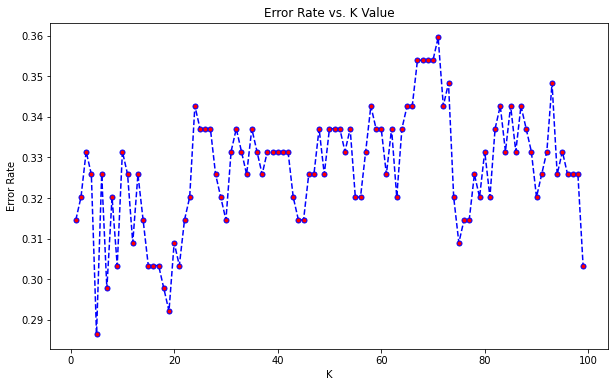

In [75]:
# create a list for error rate
error_rate = []

# create a range for k values
for k in range(1,100):


  # build knn classifier model for each value of k
  model = KNeighborsClassifier(n_neighbors=k)
  
  # fit knn model
  model.fit(X_train,y_train)

  # predict y for X_test
  y_pred = model.predict(X_test)

  # append error of the classification into the error rate list
  error_rate.append(np.mean(y_pred != y_test))

# derive the plot between error rate and values of k in he given range

plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error = ",min(error_rate),"at K = ",error_rate.index(min(error_rate)))

In [76]:
# build KNN model for different train and test sizes

# create a list of different test sizes
test = [0.3, 0.4]

# create loop to perform knn twice for different test sizes.

for size in test:

    # split data into train and test data picking records at random
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size)

    # build knn classifier model
    from sklearn.neighbors import KNeighborsClassifier
 
    # create classifier object
    model = KNeighborsClassifier(n_neighbors=4)
 
    # fit the classifier with x and y data
    model.fit(X_train, y_train) 

    # predict
    y_pred = model.predict(X_test)

    # evaluate results

    from sklearn.metrics import accuracy_score, confusion_matrix

    print(confusion_matrix(y_test,y_pred))
    print(accuracy_score(y_test,y_pred))

    print('##################################################################')

[[138  22]
 [ 67  40]]
0.6666666666666666
##################################################################
[[194  30]
 [ 75  57]]
0.7050561797752809
##################################################################


Accuracy ranges between 66 and 72 percent accuracy. Let's optimize our model to improve accuracy using cosine similarity. We hope to get better results since we do not have negative values.

In [77]:
# cosine similarity approach

model = KNeighborsClassifier(n_neighbors=4,
                         metric='cosine',
                         algorithm='brute',
                         n_jobs=-1)
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate results

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[202  22]
 [ 71  61]]
0.7387640449438202


Sklearn cosine similarity method results in a 73% accuracy which is better.

* challenge solution
* recommendation
* conclusion